# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  # display all columns

# Loading the data

In [2]:
data_path = "../data/raw/jena_climate_2017_2024.csv"
df = pd.read_csv(data_path)
df["Date Time"] = pd.to_datetime(df["Date Time"])  # making sure that the column `Date Time` is in datetime format
df.set_index("Date Time", inplace=True)  # setting the `Date Time` column as index
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:10:00,999.77,-4.91,268.27,-8.41,76.3,4.24,3.23,1.00,2.01,3.23,1296.76,0.78,1.56,184.0,0.0,0.0,0.0,0.0,0.0,7.10,434.3
2017-01-01 00:20:00,999.63,-5.05,268.13,-8.37,77.4,4.19,3.24,0.95,2.02,3.24,1297.27,1.52,1.92,202.6,0.0,0.0,0.0,0.0,0.0,7.72,434.1
2017-01-01 00:30:00,999.54,-4.98,268.21,-8.38,76.9,4.21,3.24,0.97,2.02,3.24,1296.80,0.98,1.78,227.4,0.0,0.0,0.0,0.0,0.0,8.77,430.4
2017-01-01 00:40:00,999.40,-4.88,268.33,-8.56,75.2,4.25,3.19,1.05,1.99,3.20,1296.12,1.16,1.80,212.5,0.0,0.0,0.0,0.0,0.0,9.36,430.6
2017-01-01 00:50:00,999.17,-5.17,268.06,-8.74,75.8,4.15,3.15,1.01,1.96,3.15,1297.27,1.50,2.64,222.1,0.0,0.0,0.0,0.0,0.0,9.45,429.5


In [3]:
df.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)',
       'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)'],
      dtype='object')

# Preliminary analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420782 entries, 2017-01-01 00:10:00 to 2025-01-01 00:00:00
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   p (mbar)              420782 non-null  float64
 1   T (degC)              420782 non-null  float64
 2   Tpot (K)              420782 non-null  float64
 3   Tdew (degC)           420782 non-null  float64
 4   rh (%)                420782 non-null  float64
 5   VPmax (mbar)          420782 non-null  float64
 6   VPact (mbar)          420782 non-null  float64
 7   VPdef (mbar)          420782 non-null  float64
 8   sh (g/kg)             420782 non-null  float64
 9   H2OC (mmol/mol)       420782 non-null  float64
 10  rho (g/m**3)          420782 non-null  float64
 11  wv (m/s)              420782 non-null  float64
 12  max. wv (m/s)         420782 non-null  float64
 13  wd (deg)              420782 non-null  float64
 14  rain (mm)         

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420782.0,989.676829,9.028939,952.51,984.46,990.22,995.51,1020.07
T (degC),420782.0,10.695257,8.105074,-19.96,4.46,10.28,16.56,37.95
Tpot (K),420782.0,284.699340,8.227164,254.57,278.40,284.43,290.61,312.21
Tdew (degC),420782.0,5.936867,6.332785,-21.17,1.22,6.13,10.87,22.25
rh (%),420782.0,75.432715,18.260475,14.23,63.12,78.68,90.30,100.00
VPmax (mbar),420782.0,14.611384,8.123367,1.24,8.41,12.53,18.87,66.13
VPact (mbar),420782.0,10.103949,4.242461,1.12,6.68,9.44,13.03,26.88
VPdef (mbar),420782.0,4.507376,5.587552,0.00,0.89,2.36,5.93,56.72
sh (g/kg),420782.0,6.382467,2.696275,0.71,4.21,5.96,8.23,17.13
H2OC (mmol/mol),420782.0,10.214542,4.297306,1.14,6.75,9.55,13.17,27.26


**Observations:**
* It seems like the missing values in some columns are filled with `-9999`.

# Duplicates

In [6]:
df[df.index.duplicated(keep=False)].sort_index()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
2020-05-12 06:00:00,991.53,-1.57,272.25,-2.09,96.20,5.44,5.24,0.21,3.29,5.28,1269.29,1.04,1.68,215.40,0.0,0.0,84.91,176.64,199.61,10.19,445.9
2020-05-12 06:00:00,991.53,-1.57,272.25,-2.09,96.20,5.44,5.24,0.21,3.29,5.28,1269.29,1.04,1.68,215.40,0.0,0.0,84.91,176.64,199.61,10.19,445.9
2022-03-03 13:50:00,992.80,5.71,279.44,-5.41,44.45,9.17,4.08,5.09,2.56,4.11,1238.31,4.18,5.75,48.44,0.0,0.0,501.70,902.82,918.27,16.74,435.6
2022-03-03 13:50:00,992.80,5.71,279.44,-5.41,44.45,9.17,4.08,5.09,2.56,4.11,1238.31,4.18,5.75,48.44,0.0,0.0,501.70,902.82,918.27,16.74,435.6
2022-04-02 07:10:00,983.98,-1.14,273.27,-4.73,76.44,5.62,4.29,1.32,2.72,4.36,1258.10,5.01,8.29,31.34,0.0,0.0,44.38,87.93,104.24,6.56,430.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-21 05:00:00,966.34,11.11,287.06,10.99,99.20,13.24,13.13,0.11,8.50,13.59,1178.16,1.56,2.98,167.80,0.0,0.0,0.00,0.00,0.00,20.02,444.2
2023-10-21 05:10:00,966.47,11.07,287.01,10.98,99.40,13.20,13.13,0.08,8.49,13.58,1178.49,2.30,3.20,170.20,0.0,0.0,0.00,0.00,0.00,20.00,445.5
2023-10-21 05:10:00,966.47,11.07,287.01,10.98,99.40,13.20,13.13,0.08,8.49,13.58,1178.49,2.30,3.20,170.20,0.0,0.0,0.00,0.00,0.00,20.00,445.5


In [7]:
df[df.index.duplicated(keep=False)].duplicated().sum()

np.int64(151)

All duplicate rows are identical. So, I will keep only the first occurrences of them.

In [8]:
df = df[~df.index.duplicated(keep='first')]

In [9]:
df_with_nan = df.replace(-9999, np.nan)

# Missing values

In [10]:
df_with_nan.isna().sum()

p (mbar)                  0
T (degC)                  0
Tpot (K)                  0
Tdew (degC)               0
rh (%)                    0
VPmax (mbar)              0
VPact (mbar)              0
VPdef (mbar)              0
sh (g/kg)                 0
H2OC (mmol/mol)           0
rho (g/m**3)              0
wv (m/s)                  1
max. wv (m/s)             0
wd (deg)                  0
rain (mm)                 0
raining (s)               0
SWDR (W/m²)               1
PAR (µmol/m²/s)           0
max. PAR (µmol/m²/s)    128
Tlog (degC)               0
CO2 (ppm)               810
dtype: int64

In [11]:
# Percentage of missing values

(df_with_nan.isna().sum() / len(df))*100

p (mbar)                0.000000
T (degC)                0.000000
Tpot (K)                0.000000
Tdew (degC)             0.000000
rh (%)                  0.000000
VPmax (mbar)            0.000000
VPact (mbar)            0.000000
VPdef (mbar)            0.000000
sh (g/kg)               0.000000
H2OC (mmol/mol)         0.000000
rho (g/m**3)            0.000000
wv (m/s)                0.000238
max. wv (m/s)           0.000000
wd (deg)                0.000000
rain (mm)               0.000000
raining (s)             0.000000
SWDR (W/m²)             0.000238
PAR (µmol/m²/s)         0.000000
max. PAR (µmol/m²/s)    0.030430
Tlog (degC)             0.000000
CO2 (ppm)               0.192568
dtype: float64

## Visualizing missing values

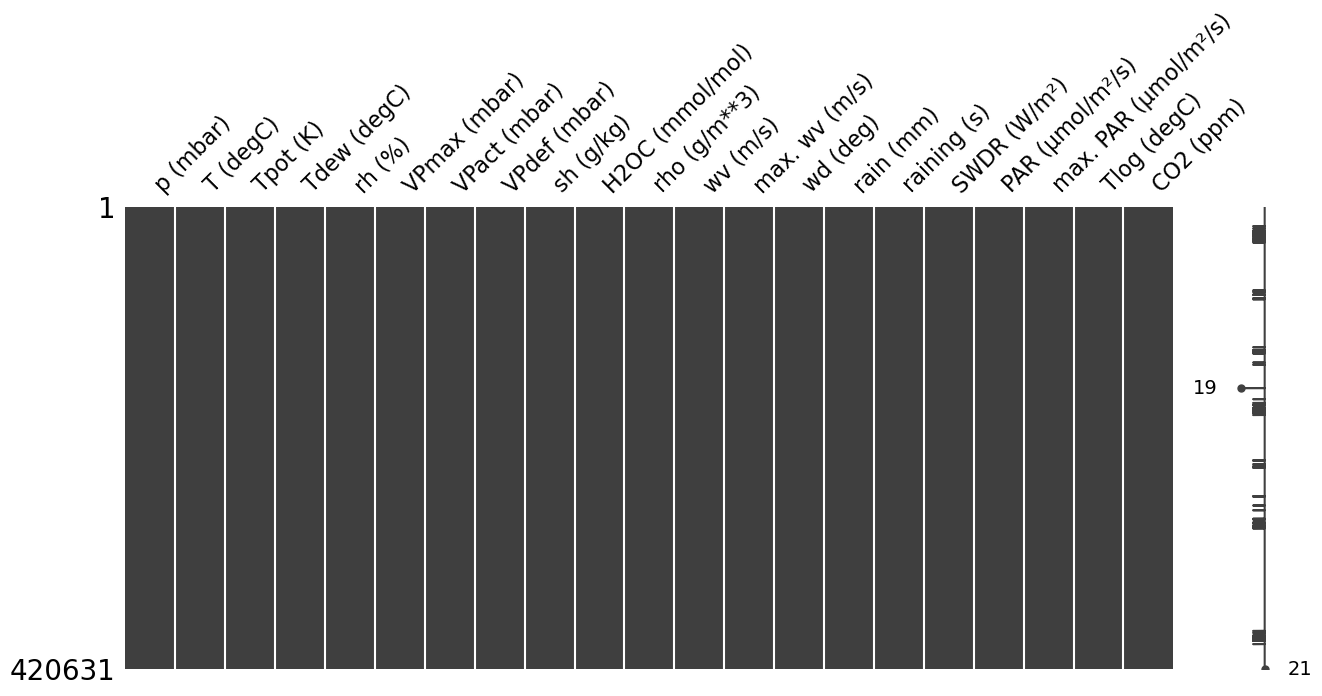

In [12]:
msno.matrix(df_with_nan, figsize=(15,6));

**Observations:**
* Very few values in the data are missing.

## Correlation of missingness

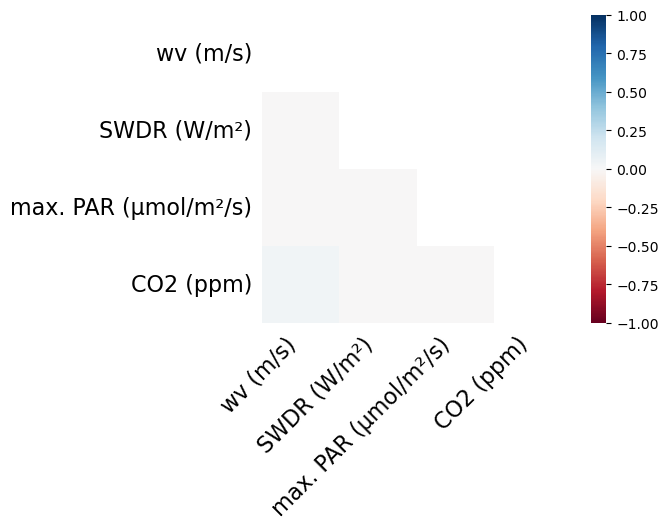

In [13]:
msno.heatmap(df_with_nan, figsize=(5,4));

**Observations:**
* The missingness is not correlated.

# CO₂ concentration over time

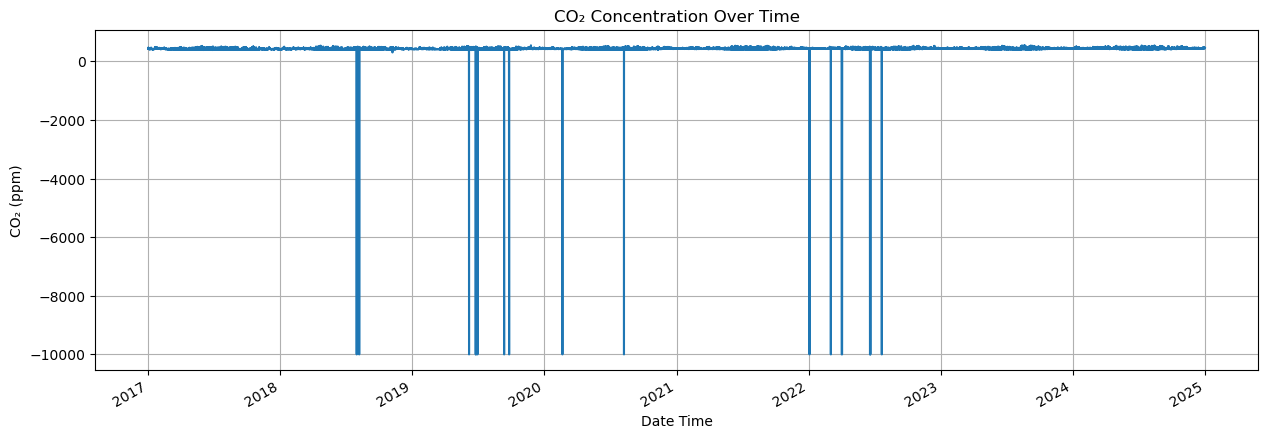

In [14]:
df['CO2 (ppm)'].plot(figsize=(15,5), title="CO₂ Concentration Over Time")
plt.ylabel("CO₂ (ppm)")
plt.grid(True)
plt.show();

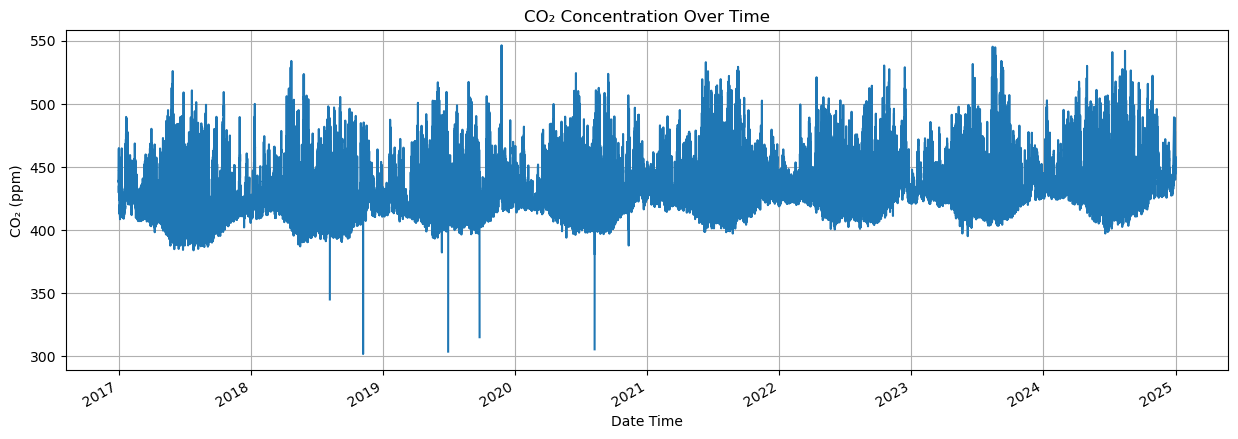

In [15]:
df_with_nan['CO2 (ppm)'].plot(figsize=(15,5), title="CO₂ Concentration Over Time")
plt.ylabel("CO₂ (ppm)")
plt.grid(True)
plt.show();

**Observations:**
* The CO₂ concentration does seem to have some extreme values in the negative direction that should be investigated.

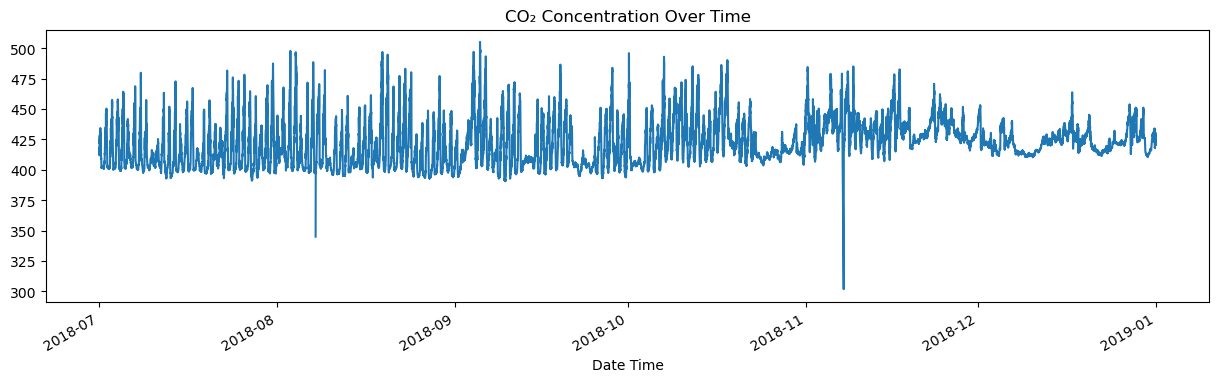

In [16]:
df_with_nan['2018-07-01':'2018-12-31']['CO2 (ppm)'].plot(figsize=(15,4))
plt.title("CO₂ Concentration Over Time")
plt.show();

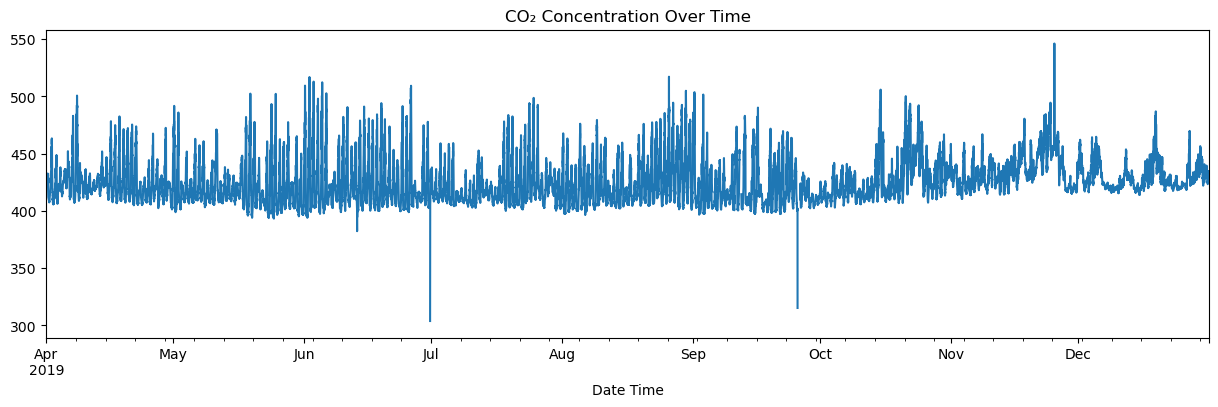

In [17]:
df_with_nan['2019-04-01':'2019-12-31']['CO2 (ppm)'].plot(figsize=(15,4))
plt.title("CO₂ Concentration Over Time")
plt.show();

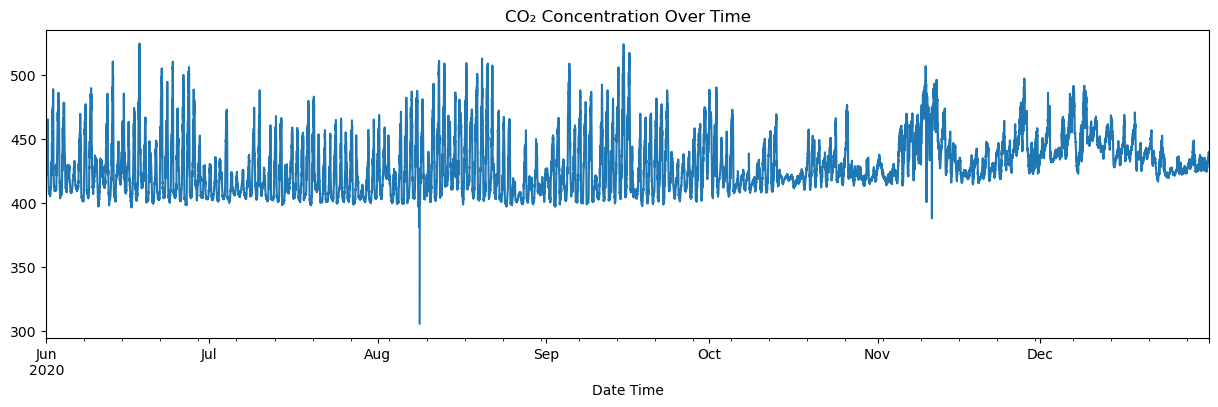

In [18]:
df_with_nan['2020-06-01':'2020-12-31']['CO2 (ppm)'].plot(figsize=(15,4))
plt.title("CO₂ Concentration Over Time")
plt.show();

**Observations:**
* These values seem erroneous. We may remove them.

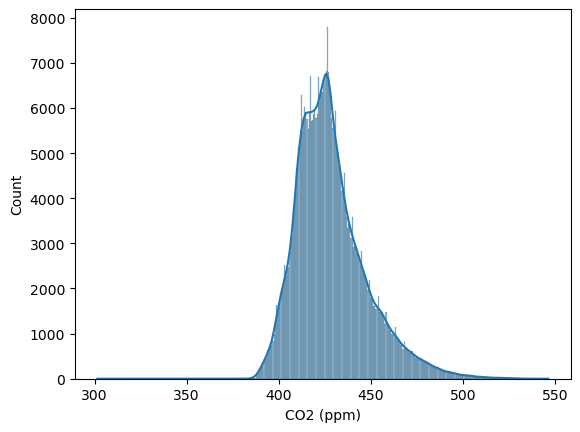

In [19]:
sns.histplot(df_with_nan['CO2 (ppm)'], kde=True);

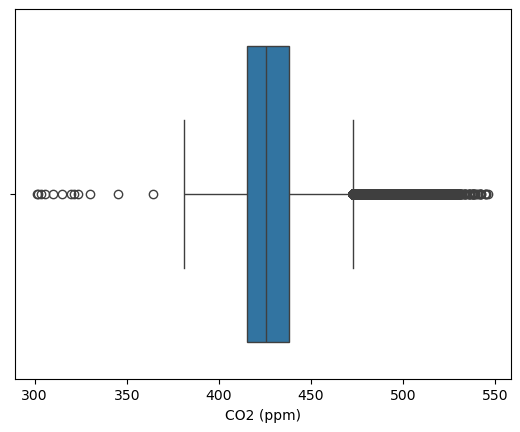

In [20]:
sns.boxplot(x=df_with_nan['CO2 (ppm)']);

**Observations:**
* The boxplot shows much more values as extreme. We cannot remove them all.
* We will consider all values below 375 as extreme and replace them with `NaN`. Then, we will impute them with some appropriate method.

# Correlation

In [21]:
df_with_nan.corr()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
p (mbar),1.000000,-0.093795,-0.181758,-0.134458,-0.020589,-0.070554,-0.114999,-0.015268,-0.132160,-0.132328,0.380248,-0.261807,-0.262322,-0.114525,-0.047444,-0.149068,0.054090,0.048940,0.034205,-0.053939,0.116936
T (degC),-0.093795,1.000000,0.996053,0.845960,-0.580799,0.960478,0.822747,0.771819,0.821872,0.822282,-0.955322,0.076626,0.102011,-0.010628,0.010660,-0.100509,0.465470,0.476550,0.468730,0.976139,-0.363598
Tpot (K),-0.181758,0.996053,1.000000,0.847463,-0.571929,0.955067,0.822894,0.763840,0.823573,0.823993,-0.977424,0.099229,0.124326,-0.000245,0.014767,-0.086068,0.454880,0.466285,0.459900,0.968986,-0.369729
Tdew (degC),-0.134458,0.845960,0.847463,1.000000,-0.069630,0.755452,0.974304,0.358642,0.973770,0.974176,-0.844224,-0.081202,-0.078572,0.035469,0.054781,0.003246,0.196179,0.209765,0.212619,0.798859,-0.096080
rh (%),-0.020589,-0.580799,-0.571929,-0.069630,1.000000,-0.618829,-0.066795,-0.849045,-0.066067,-0.066208,0.505746,-0.289284,-0.332967,0.057557,0.069211,0.221321,-0.560416,-0.560215,-0.547446,-0.602326,0.561704
VPmax (mbar),-0.070554,0.960478,0.955067,0.755452,-0.618829,1.000000,0.765668,0.872623,0.765025,0.765167,-0.901508,0.074178,0.100392,-0.042837,0.002344,-0.100559,0.500706,0.512565,0.498740,0.959099,-0.373883
VPact (mbar),-0.114999,0.822747,0.822894,0.974304,-0.066795,0.765668,1.000000,0.353989,0.999819,0.999821,-0.814417,-0.095834,-0.096226,0.012351,0.061038,0.001928,0.198468,0.211983,0.213554,0.789693,-0.073909
VPdef (mbar),-0.015268,0.771819,0.763840,0.358642,-0.849045,0.872623,0.353989,1.000000,0.353190,0.353396,-0.692402,0.180617,0.219030,-0.071663,-0.042934,-0.147673,0.577323,0.584305,0.563007,0.794911,-0.487890
sh (g/kg),-0.132160,0.821872,0.823573,0.973770,-0.066067,0.765025,0.999819,0.353190,1.000000,0.999997,-0.818519,-0.090879,-0.091374,0.014282,0.062024,0.004796,0.196774,0.210334,0.212196,0.788394,-0.075638
H2OC (mmol/mol),-0.132328,0.822282,0.823993,0.974176,-0.066208,0.765167,0.999821,0.353396,0.999997,1.000000,-0.818967,-0.090787,-0.091261,0.014431,0.061968,0.004787,0.196846,0.210409,0.212281,0.788706,-0.075867


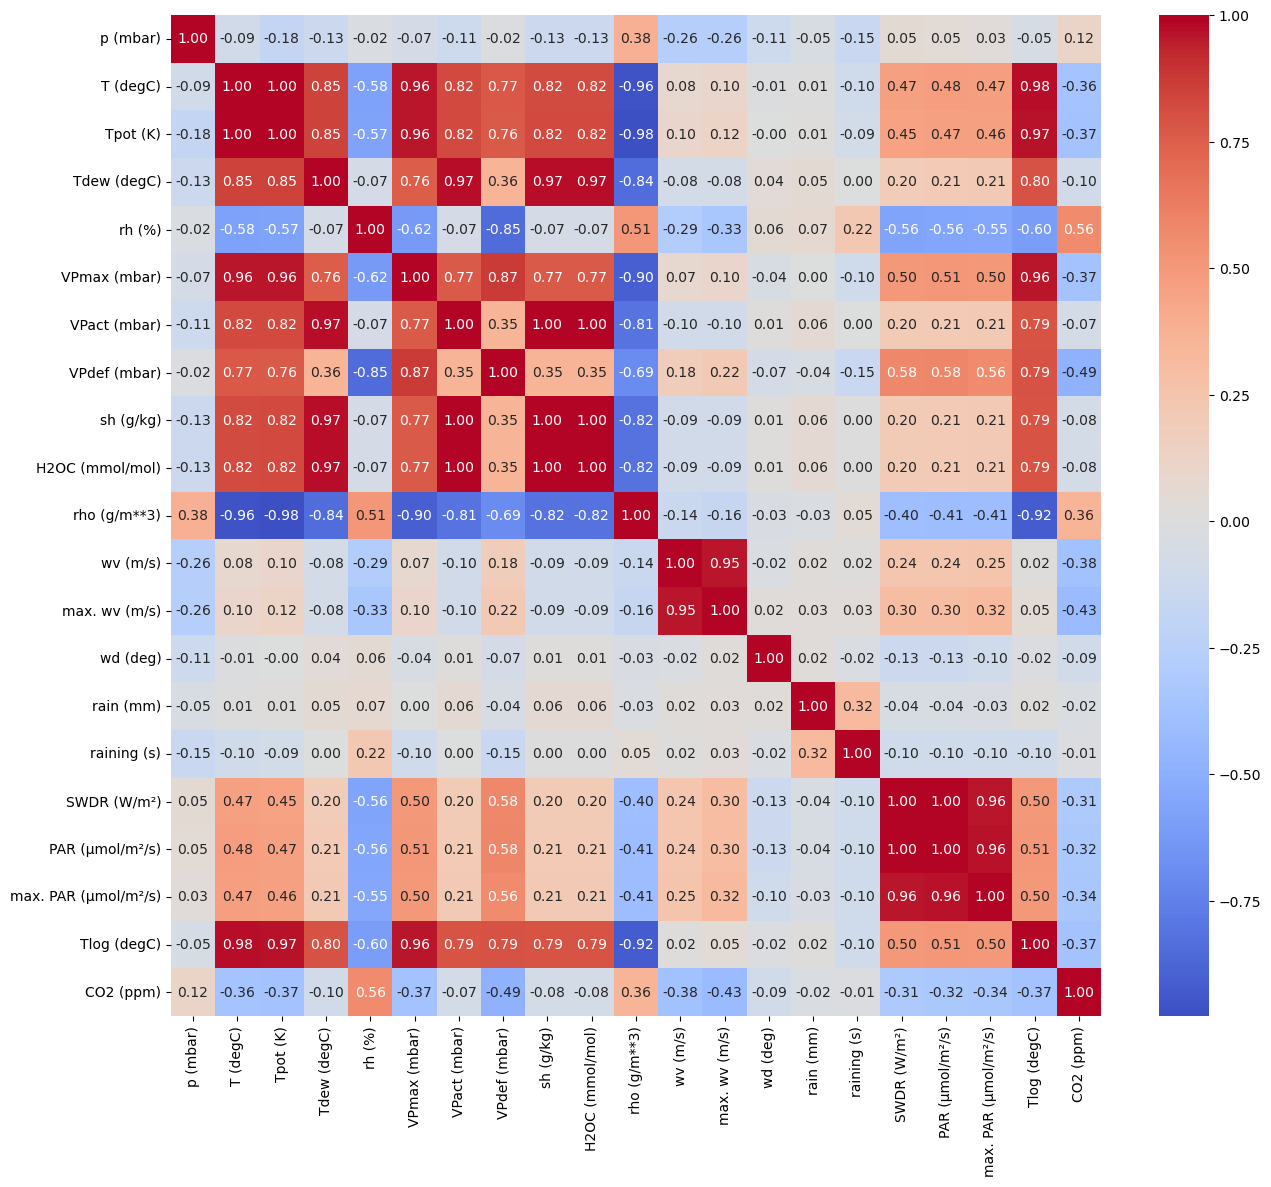

In [22]:
plt.figure(figsize=(15,13))
sns.heatmap(df_with_nan.corr(), cmap='coolwarm', center=0, annot=True, fmt='.2f');